# Deeper Neural Networks - Lab

## Introduction
In this lab, we'll extend our neural networks knowledge further and add one hidden layer in our neural network. 

We'll perform forward propagation, backward propagation, and work with activation functions we haven't used before: the hyperbolic tangent or "tanh" activation function. Let's get started!

## Objectives

You will be able to:
* Generate a random dataset
* Graph a decision boundary for a 2 variable classifier
* Create a Neural Net Classifier

## Import packages and generate the data

Let's first start with importing the necessary libraries. We'll use plotting as well as numpy. Additionally, we'll generate our own data using scikit-learn, so we have to use that library as well.

In [1]:
# Code provided; just run this cell
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_classification
from sklearn import linear_model

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

Next, let's generate our data. Scikit-learns enables the creation of simple toy datasets to visualize clustering and classification algorithms. One of them is called `make_circles` and generates a a large circle containing a smaller circle in 2D. `make_circles`-function has several arguments, but here we'll just use 2: `n_samples` and `noise`. We'll create a data set with 500 samples, and insert noise equal to 0.1.

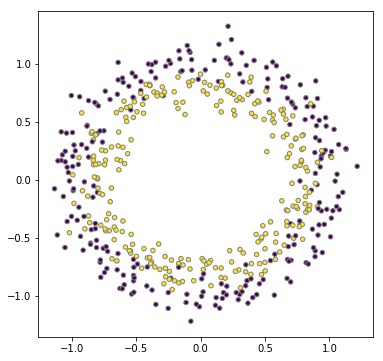

In [2]:
#Code provided; just run this cell
# Generate a dataset and plot it
np.random.seed(123)
sample_size = 500
X, Y = sklearn.datasets.make_circles(n_samples = sample_size, noise = 0.1)
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
plt.scatter(X[:,0], X[:,1], s=20, c=Y, edgecolors="gray")

Note that we just generated to "classes": the yellow dots and the purple dots. The goal of this lab is to create a model which can create a so-called "decision boundry" to distinguish the smaller (yellow) circle from the larger (purple) one.

We'll build a neural network to do this. But first, let's build a logistic regression model and see how that model performs. 

## Build a logistic regression model

Use the Scikit-learn function `linear_model.LogisticRegression()` to build a logistic regression model. (This should include initialization and fitting the model to our data.)

In [3]:
#Your code here
logreg = linear_model.LogisticRegression()
logreg.fit(X,Y)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

You'll use this helper function to visualize the classification performance.

In [4]:
#Code provided; just run this cell
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .3, X[:, 0].max() + .3
    y_min, y_max = X[:, 1].min() - .3, X[:, 1].max() + .3
    h = 0.005
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z)
    plt.scatter(X[:, 0], X[:, 1],s=20, c=Y ,edgecolors="gray")

In the helper function, let's create a lambda function inside `plot_decision_boundary` in order to create a decision boundart using the predictions made by the logistic regression model `log_reg`.

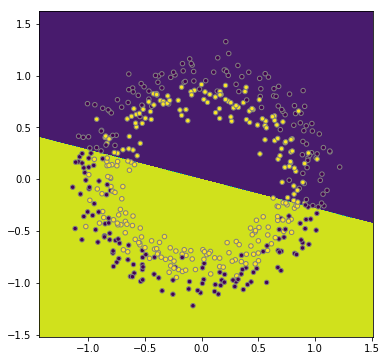

In [5]:
#Your code here
#Use the helper function provided to plot the decision boundary of your classifier above.
plot_decision_boundary(lambda x: logreg.predict(x))

Now explicitly store the predictions using `X` in `log_reg_predict`, so we can calculate the accuracy.`m

In [6]:
log_reg_predict = logreg.predict(X)

In [7]:
#Code provided; just run this cell
print ('The logistic regression model has an accuracy of: ' 
       + str(np.sum(log_reg_predict == Y)/sample_size*100) + '%')

The logistic regression model has an accuracy of: 51.2%


**How did this model perform? Is this a surprise? **

## Build a neural network

## Network architecture and data pre-processing

Let's see if a neural network can do better. In what follows, you'll build a neural network with one hidden layer (the hidden layer has 6 units, as follows):

![title](figures/lab_2_graph.png)

Let's reintroduce some of the terminology.

- remember that the input layer passes on $a^{[0]}$ to the next layer, which simply is equal to $x = (x_1, x_2)$. 

- The hidden layer passes on $a^{[1]} = \begin{bmatrix} a^{[1]}_1  \\a^{[1]}_2 \\ a^{[1]}_3 \\ a^{[1]}_4\\ a^{[1]}_5\\ a^{[1]}_6\end{bmatrix}$

- The final layer outputs $a^{[2]}$ which is $\hat y$.

Note that the input layer has 2 inputs, $x_1$ and $x_2$ (which are basically the x- and y-coordinates in the graph with the two circles above). Let's look at the shape of the X-matrix.

In [8]:
#Your code here; print the shape of X to the console
X.shape

(500, 2)

Remember that for the neural networks, we want the number of inputs to be rows and the number of cases to be columns. Hence we transpose this matrix.

In [9]:
X_nn = X.T

Similarly, for the labels, we like to have a row-matrix.

In [10]:
Y_nn = Y.reshape(1,500)

In [11]:
#Check the shape of your resulting objects
X_nn.shape, Y_nn.shape

((2, 500), (1, 500))

As per the network architecture above, there are two nodes in the input layer, and 1 node in the output layer (with a sigmoid activation). This will create three objects to store the size of each layer: `n_0`, `n_1` and `n_2`. `n_0` (input layer size) and `n_2` (output layer size) are defined by the data, `n_1` is a hyperparameter and can be changed to optimize the result! For this exercise, we've chosen to have 6 nodes in the hidden layer, so let's hardcode the size `n_1` equal to 6. 

In [12]:
n_0 = X_nn.shape[0]#Your code here; appropriately define each variable
n_1 = 6#Your code here; appropriately define each variable
n_2 = Y_nn.shape[0]#Your code here; appropriately define each variable

## Forward propagation

Let's start forward propagating from $a^{[0]}$ to $a^{[1]}$. Recall that this is a function which takes our input layer $a^{[0]}$ and transforms it to the hidden layer $a^{[1]}$.  
Note that for each sample $x^{(i)}= (x_{1}^{(i)},x_{2}^{(i)})$, we compute $a^{[1] (i)}$:
First, let's get to $z^{[1] (i)}$ using $W^{[1]}$ and  $b^{[1]}$:

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}$$ 

Then, we'll use the hyperbolic tangent function as an activation function to get to $a^{[1] (i)}$.

$$a^{[1] (i)} = \tanh(z^{[1] (i)})$$


In this example, $W^{[1]}$ is a (6 x 2)-matrix, $b^{[1]}$ is a (6 x 1)-matrix.

In order to get to $a^{[1] (i)}$, we need to initialize this $W^{[1]}$ and $b^{[1]}$. 
Let's initialize $b^{[1]}$ as a matrix of zeroes, and $W^{[1]}$ as a matrix with random number generated by the standard normal distribution, but then multiplied by 0.05 to make them smaller.

Next, let's go one step further and do the same thing for $W^{[2]}$ and $b^{[2]}$.
Recall that: 
$$z^{[2] (i)} =  W^{[2]} a^{[1](i)} + b^{[2]}$$ 

What are the correct dimensions for $W^{[2]}$ and $b^{[2]}$? Use `n_0`, `n_1` and `n_2`, and look at the network graph above to get to the right dimensions!


In [13]:
#Code provided; simply run this cell block
def initialize_parameters(n_0, n_1, n_2):
    np.random.seed(123) 
    W1 = np.random.randn(n_1, n_0) * 0.05 
    b1 = np.zeros((n_1, 1))
    W2 =  np.random.randn(n_2, n_1) * 0.05 
    b2 = np.zeros((n_2, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [14]:
parameters = initialize_parameters(n_0, n_1, n_2)#Use the provided function along with your variable presets above to store the parameters here. 

In [15]:
parameters #Simply run this code block; your output should match the results previewed here.

{'W1': array([[-0.05428153,  0.04986727],
        [ 0.01414892, -0.07531474],
        [-0.02893001,  0.08257183],
        [-0.12133396, -0.02144563],
        [ 0.06329681, -0.04333702],
        [-0.03394431, -0.00473545]]), 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]), 'W2': array([[ 0.07456948, -0.0319451 , -0.0221991 , -0.02171756,  0.1102965 ,
          0.1093393 ]]), 'b2': array([[0.]])}

In [16]:
parameters['W1']

array([[-0.05428153,  0.04986727],
       [ 0.01414892, -0.07531474],
       [-0.02893001,  0.08257183],
       [-0.12133396, -0.02144563],
       [ 0.06329681, -0.04333702],
       [-0.03394431, -0.00473545]])

Now let's perform the actual forward propagation step to calculate  $z^{[1]}, a^{[1]}, z^{[2]}$ and $a^{[2]}$. You can use the function `np.tanh()` to compute the hyperbolic tangent function. Additionally, remember that $$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)}).$$
You can compute the sigmoid as $\sigma(z^{ [2] (i)}) = \displaystyle\frac{1}{1 + \exp(z^{ [2] (i)})}$


In [17]:
#Finish this partially defined function as noted in the comments below.
def forward_propagation(X, parameters):
    W1 = parameters['W1']#Your code here; retrieve the appropriate values from the parameters object 
    b1 = parameters['b1']#Your code here; retrieve the appropriate values from the parameters object 
    W2 = parameters['W2']#Your code here; retrieve the appropriate values from the parameters object 
    b2 = parameters['b2']#Your code here; retrieve the appropriate values from the parameters object 
    
    Z1 =  np.dot(W1,X) + b1#Your code here; write a formula to calculate Z1
    A1 =  np.tanh(Z1)#Your code here; write a formula to calculate A1
    Z2 =  np.dot(W2,A1) + b2#Your code here; write a formula to calculate Z2
    A2 =  1/(1+np.exp(-Z2))#Your code here; write a formula to calculate A2
        
    fw_out = {"Z1": Z1,
              "A1": A1,
              "Z2": Z2,
              "A2": A2}
    
    return fw_out

In [18]:
fw_out = forward_propagation(X_nn, parameters)#Your code here; call your function above along with our defined parameters.

Inspect `Z1`, `A1`, `Z2` and `A2` and make sure that the shape of all the outputs is correct!

In [19]:
#Your code here; check the shape of Z1
fw_out['Z1'].shape

(6, 500)

In [20]:
#Your code here; check the shape of Z2
fw_out['Z2'].shape

(1, 500)

In [21]:
#Your code here; check the shape of A1
fw_out['A1'].shape

(6, 500)

In [22]:
#Your code here; check the shape of A2
fw_out['A2'].shape

(1, 500)

## Compute the cost function

$a^{[2] (i)}$ provides us with the predictions on all the samples, you can then compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) $$

Write a cost function `compute_cost(A2, Y, parameters)` which returns the associated cost using the formula above.

In [23]:
#Complete the skeleton of this function provided as noted in the comments below.
def compute_cost(A2, Y, parameters):
    m = np.shape(Y)[1] 
    log = Y*np.log(A2) + (1-Y)*np.log(1-A2)
    #Implement the formula provided above for the cost, J
    cost = (-1/m)*np.sum(log)
    #you may wish to do this in multiple steps to avoid an overly large line of code
    
    return cost

In [24]:
#Use your function as defined above to compute the cost given our problem as defined.
compute_cost(fw_out['A2'], Y_nn, parameters)

0.6931475711935989

## Backward propagation

Let's now move backwards again. From what you have seen in the lecture, you can use the following expressions to calculate the derivatives with respect to $z$, $W$, and $b$.

$ dz^{[2]}= a^{[2]} - y $

$ dW^{[2]} = dz^{[2]} a^{[1]T}$

$ db^{[2]} = dz^{[2]} $ 

$ dz^{[1]} =  dW^{[2]T}dz^{[2]} * g'{[1]}(z^{[1]})$

$ dW^{[1]} = dz^{[1]} x^T$

$ db^{[1]} = dz^{[1]}$


Recall that $dz^{[1]}$ and $dz^{[2]}$ will be matrices of shape (6, 500) and (1, 500) respectively. $dz^{[1]}$ and  $dz^{[2]}$ however are matrices of size (6, 1) and (1, 1). We'll need to take the averages over the 500 columns in the matrices. You can use python code of the form ```(1/m) * np.sum(dZ1,  axis=1, keepdims=True)```. We need to apply $1/m$ to compute $dW^{[1]}$ and $dW^{[2]}$ as well.


About $g^{[1]'}(z^{[1]})$: since $g^{[1]}(z^{[1]})$ is the tanh-function, its derivative $g^{[1]'}(z^{[1]})$ is equal to $1-a^2$. You can use `np.power` to compute this.

In [25]:
def backward_propagation(parameters, fw_out, X, Y):
    m = X.shape[1]

    W1 = parameters['W1']#Your code here; retrieve the appropriate parameter from the parameters variable
    W2 = parameters['W2']#Your code here; retrieve the appropriate parameter from the parameters variable

    A1 = fw_out['A1']#Your code here; retrieve the appropriate parameter from fw_out
    A2 = fw_out['A2']#Your code here; retrieve the appropriate parameter from fw_out
    
    dZ2 = A2 - Y#Your code here; use the formula provided above
    dW2 = (1/m) * np.dot(dZ2, A1.T) #Code provided
    db2 = (1/m) * np.sum(dZ2,  axis=1, keepdims=True) #Code provided
    dZ1 = np.dot(dW2.T,dZ2)*(1-np.power(A1,2))#Your code here; use the formula provided above
    dW1 = (1/m)*np.dot(dZ1,X.T)#Mirror the code provided above
    db1 = (1/m) * np.sum(dZ1,  axis=1, keepdims=True)#Mirror the code provided above
    
    bw_out = {"dW1": dW1,
              "db1": db1,
              "dW2": dW2,
              "db2": db2}
    
    return bw_out

In [26]:
bw_out = backward_propagation(parameters,fw_out,X_nn,Y_nn)#Use your function above to create the bw_out variable

## Update the parameters

To update the parameters, let's go back and use the outputs of the parameter initialization and the backward propagation.

In [27]:
def update_parameters(parameters, bw_out, alpha = 0.7):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = bw_out["dW1"]
    db1 = bw_out["db1"]
    dW2 = bw_out["dW2"]
    db2 = bw_out["db2"]
    
    W1 = W1 - alpha*dW1#Your code here; update the values for each variable
    b1 = b1 - alpha*db1#Your code here; update the values for each variable
    W2 = W2 - alpha*dW2#Your code here; update the values for each variable
    b2 = b2 - alpha*db2#Your code here; update the values for each variable
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [28]:
update_parameters(parameters,bw_out) #Simply run this block of code. Output should match the results previewed below.

{'W1': array([[-0.05428162,  0.04986702],
        [ 0.01414914, -0.07531415],
        [-0.02893023,  0.08257122],
        [-0.12133377, -0.02144509],
        [ 0.06329688, -0.04333685],
        [-0.03394426, -0.00473531]]), 'b1': array([[ 1.88421731e-08],
        [-4.72152527e-08],
        [ 6.27550290e-08],
        [-1.12390470e-07],
        [-1.38869385e-08],
        [-2.40392866e-09]]), 'W2': array([[ 0.07449547, -0.03177459, -0.02237429, -0.0215612 ,  0.11034683,
          0.10938032]]), 'b2': array([[1.82562182e-06]])}

In [29]:
#Now its time to put it all together to build our full neural network! Complete the templated function below.
def nn_model(X, Y, n_1, num_iter = 10000, print_cost=False):
    np.random.seed(3)
    n_x = np.shape(X)[0] 
    n_y = np.shape(Y)[0] 

    parameters = initialize_parameters(n_x, n_1, n_y)#Your code here; use our previous function above to set parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]    

    for i in range(0, num_iter):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "fw_out".
        fw_out = forward_propagation(X, parameters)
        
        # We'll need A2 from fw_out to add it in the cost function
        A2 = fw_out["A2"]
        
        # Use the cost function with inputs: "A2", "Y", "parameters".
        cost = compute_cost(A2, Y, parameters)
 
        # Use the backward propagation function with inputs: "parameters", "fw_out", "X", "Y".
        bw_out = backward_propagation(parameters, fw_out, X, Y)
 
        # Parameter update with gradient descent. Inputs: "parameters" and"bw_out".
        parameters = update_parameters(parameters, bw_out)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [30]:
#Code provided; review for understanding but no editing needed!
def predict(parameters, X):
    fw_out = forward_propagation(X, parameters)
    A2 = fw_out["A2"]

    predictions = A2 > 0.5
    return predictions

Cost after iteration 0: 0.693148
Cost after iteration 1000: 0.693092
Cost after iteration 2000: 0.693085
Cost after iteration 3000: 0.693084
Cost after iteration 4000: 0.693084
Cost after iteration 5000: 0.693084
Cost after iteration 6000: 0.693084
Cost after iteration 7000: 0.693084
Cost after iteration 8000: 0.693084
Cost after iteration 9000: 0.693084


Text(0.5, 1.0, 'Decision Boundary for neural network with 1 hidden layer')

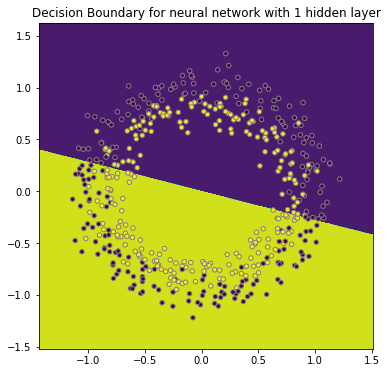

In [31]:
#Code provided; review for understanding but no editing needed!
parameters = nn_model(X_nn, Y_nn, n_1 = 6, num_iter = 10000, print_cost = True)

# Plot the decision boundary
plot_decision_boundary(lambda X: predict(parameters, X.T)) 
plt.title("Decision Boundary for neural network with 1 hidden layer")

In [32]:
#Code provided; review for understanding but no editing needed!
nn_predict = predict(parameters, X.T)

In [33]:
#Code provided; review for understanding but no editing needed!
print ('The logistic regression model has an accuracy of: ' 
       + str(np.sum(nn_predict == Y)/sample_size*100) + '%')

The logistic regression model has an accuracy of: 51.2%


## Additional Resources

This example should be another helpful introduction to building neural networks. For more information about introductory neural networks, see some of the resources below.

https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb --> helper function

http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

https://beckernick.github.io/neural-network-scratch/

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

## Summary 

Congratulations! You just coded a neural network!

You learned how to create a "deeper" (yet shallow) neural network, with tanh activation functions in the hidden layer. You noticed how you can notably improve results compared to a logistic regression model! Hopefully, this illustrates well why neural networks are so useful. 

Things you can do from here:
- Increase/decrease the number of nodes in the hidden layer
- Change learning rate alpha.
- Change the noise parameter in your data set.